In [1]:
using GR
using Roots

In [2]:
GR.inline()

"svg"

### 1. define the function 

In [3]:
f(x) = x^3 -2*x^2 - x + 2

f (generic function with 1 method)

### 2.using GR, show an inline plot of the function f in the interval [ -2, 3 ]

In [4]:
x = range(-2, stop = 3, length = 60)

-2.0:0.0847457627118644:3.0

In [5]:
y = [f(i) for i in x];

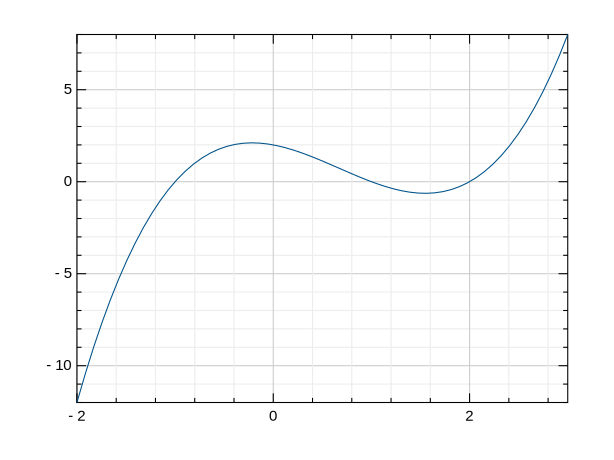

In [6]:
plot(x,y)

### 3. visually guess the zeros (roots) of f in the interval [ -2, 3 ]

In [7]:
interval_1 = [-2,0]
interval_2 = [0.8,1.2]
interval_3 = [1.6,2.4]

2-element Array{Float64,1}:
 1.6
 2.4

### 4. define the error function

In [8]:
function error(errstring)
    println(errstring)
    input = readline()
    
end

error (generic function with 1 method)

### 5

In [9]:
function rootsearch(f,a,b,dx)
    """x1,x2 = rootsearch(f,a,b,dx).
        Searches the interval (a,b) in increments dx for
        the bounds (x1,x2) of the smallest root of f(x).
        Returns x1 = x2 = None if no roots were detected
    """
    x1 = a
    f1 = f(a)
    x2 = a+dx
    f2 = f(x2)
    
    while sign(f1) == sign(f2)
        if x1 ≥ b
            return Nothing,Nothing
        end
        x1 = x2 ; f1 = f2
        x2 = x1+dx; f2 = f(x2)
    end
    
    return x1,x2
end
    

rootsearch (generic function with 1 method)

### 6

In [10]:
function bisection(f,x1,x2,switch=1,tol=1.0e-9)
    """
        root = bisection(f,x1,x2,switch=0,tol=1.0e-9).
        Finds a root of f(x) = 0 by bisection.
        The root must be bracketed in (x1,x2).
        Setting switch = 1 returns root = None if
        f(x) increases upon bisection.

    """
    f1 = f(x1)
    if f1 == 0.0
        return x1
    end
    
    f2 = f(x2)
    if f2 == 0.0
        return x2
    end
    
    if sign(f1) == sign(f2)
        error("Root is not bracketed")
    end
    
    n = Int64(ceil(log(abs(x2-x1)/tol)/log(2.0)))
    
    for i in 1:n
        x3 = 0.5*(x1+x2)
        f3 = f(x3)
        if switch == 1 && abs(f3) > abs(f1) && abs(f3) > abs(f2)
            return Nothing
        end
        
        if f3 == 0.0
            return x3
        end
        
        if sign(f2) != sign(f3)
            x1 = x3
            f1 = f3
        else
            x2 = x3
            f2 = f3
        end
    end
    
    return (x1 +x2)/2.0
    
end


bisection (generic function with 3 methods)

In [11]:
bisection(f,1.6,2.4)

2.0

### 7

In [12]:
function allroots(f, a, b, dx)
    while true
        x1,x2 = rootsearch(f,a,b,dx)
        
        if x1 ≠ Nothing
            a = x2
            root = bisection(f,x1,x2)
            if root ≠ Nothing
                println("Root is : $root")
            end
        else
            println("Done")
            break           
        end
    end
end

allroots (generic function with 1 method)

### 8

In [13]:
@timev allroots(f,-2,3,0.01)

Root is : -1.0000000002980223
Root is : 0.9999999997019791
Root is : 1.99999999970198
Done
  0.130203 seconds (346.74 k allocations: 18.200 MiB)
elapsed time (ns): 130203360
bytes allocated:   19083568
pool allocs:       346707
non-pool GC allocs:33


### 9

In [14]:
@timev find_zeros(f,-2,3)

  1.129114 seconds (4.12 M allocations: 210.286 MiB, 7.31% gc time)
elapsed time (ns): 1129113512
gc time (ns):      82569915
bytes allocated:   220500410
pool allocs:       4116590
non-pool GC allocs:664
GC pauses:         10


3-element Array{Float64,1}:
 -1.0
  1.0
  2.0

### Conclusion: the roots get from "find_zeros" method are close to the roots from the method "allroots".  Method "allroots" use less time and memory than "find_zeros"